In [1]:
import os
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
import librosa.display
from tqdm import tqdm
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score
from sklearn.model_selection import train_test_split

try:
    from spela.spectrogram import Spectrogram 
    from spela.melspectrogram import Melspectrogram
except:
    !pip install spela
    from spela.spectrogram import Spectrogram 
    from spela.melspectrogram import Melspectrogram
    
tf.compat.v1.disable_eager_execution()
data_dir = r"F:\Augmentated_Train"

In [2]:
# get wav paths
def get_wav_paths(speaker):
    speaker_path = data_dir + speaker
    all_paths = [item for item in os.listdir(speaker_path)]
    return all_paths

In [3]:
# id_list = ['ID_01','ID_03','ID_04','ID_05','ID_06','ID_07','ID_09','ÍD_10','ID_12','ID_13','ID_14','ID_15','ID_16','ID_17','ID_19','ID_20','ID_29','ID_30','ID_31','ID_32','ID_43','ID_45','ID_48','ID_50','ID_55','ID_56','ID_58','ID_64']


In [4]:
id_01_path = get_wav_paths("/ID_01")
id_03_path = get_wav_paths("/ID_03")
id_04_path = get_wav_paths("/ID_04")
id_05_path = get_wav_paths("/ID_05")
id_06_path = get_wav_paths("/ID_06")
id_07_path = get_wav_paths("/ID_07")
id_09_path = get_wav_paths("/ID_09")
id_10_path = get_wav_paths("/ID_10")
id_12_path = get_wav_paths("/ID_12")
id_13_path = get_wav_paths("/ID_13")
id_14_path = get_wav_paths("/ID_14")
id_15_path = get_wav_paths("/ID_15")
id_16_path = get_wav_paths("/ID_16")
id_17_path = get_wav_paths("/ID_17")
id_19_path = get_wav_paths("/ID_19")
id_20_path = get_wav_paths("/ID_20")
id_29_path = get_wav_paths("/ID_29")
id_30_path = get_wav_paths("/ID_30")
id_31_path = get_wav_paths("/ID_31")
id_32_path = get_wav_paths("/ID_32")
id_43_path = get_wav_paths("/ID_43")
id_45_path = get_wav_paths("/ID_45")
id_48_path = get_wav_paths("/ID_48")
id_50_path = get_wav_paths("/ID_50")
id_55_path = get_wav_paths("/ID_55")
id_56_path = get_wav_paths("/ID_56")
id_58_path = get_wav_paths("/ID_58")
id_64_path = get_wav_paths("/ID_64")

In [5]:
# load the data
def load_wav(wav_path, speaker):
    with tf.compat.v1.Session(graph=tf.compat.v1.Graph()) as sess:
        wav_path = data_dir +speaker + "/"+ wav_path
        wav_filename_placeholder = tf.compat.v1.placeholder(tf.compat.v1.string, [])
        wav_loader = tf.io.read_file(wav_filename_placeholder)
        wav_decoder = tf.audio.decode_wav(wav_loader, desired_channels=1)
        wav_data = sess.run(
            wav_decoder, feed_dict={
                wav_filename_placeholder: wav_path
            }).audio.flatten().reshape((1, 132300))
        sess.close()
    return wav_data

In [6]:
# create training data
def generate_training_data(speaker_paths, speaker, label):
    wavs, labels = [], []
    count = 0
    for i in tqdm(speaker_paths):
        if count>299:
            break
        wav = load_wav(i, speaker)
        wavs.append(wav)
        labels.append(label)
        count += 1
    return wavs, labels

In [7]:
id_01_wavs, id_01_labels = generate_training_data(id_01_path, "/ID_01",0) 
id_03_wavs, id_03_labels = generate_training_data(id_03_path, "/ID_03",1) 
id_04_wavs, id_04_labels = generate_training_data(id_04_path, "/ID_04",2)
id_05_wavs, id_05_labels = generate_training_data(id_05_path, "/ID_05",3)
id_06_wavs, id_06_labels = generate_training_data(id_06_path, "/ID_06",4)
id_07_wavs, id_07_labels = generate_training_data(id_07_path, "/ID_07",5)
id_09_wavs, id_09_labels = generate_training_data(id_09_path, "/ID_09",6)
id_10_wavs, id_10_labels = generate_training_data(id_10_path, "/ID_10",7)
id_12_wavs, id_12_labels = generate_training_data(id_12_path, "/ID_12",8)
id_13_wavs, id_13_labels = generate_training_data(id_13_path, "/ID_13",9)
id_14_wavs, id_14_labels = generate_training_data(id_14_path, "/ID_14",10)
id_15_wavs, id_15_labels = generate_training_data(id_15_path, "/ID_15",11)
id_16_wavs, id_16_labels = generate_training_data(id_16_path, "/ID_16",12)
id_17_wavs, id_17_labels = generate_training_data(id_17_path, "/ID_17",13)
id_19_wavs, id_19_labels = generate_training_data(id_19_path, "/ID_19",14)
id_20_wavs, id_20_labels = generate_training_data(id_20_path, "/ID_20",15)
id_29_wavs, id_29_labels = generate_training_data(id_29_path, "/ID_29",16)
id_30_wavs, id_30_labels = generate_training_data(id_30_path, "/ID_30",17)
id_31_wavs, id_31_labels = generate_training_data(id_31_path, "/ID_31",18)
id_32_wavs, id_32_labels = generate_training_data(id_32_path, "/ID_32",19)
id_43_wavs, id_43_labels = generate_training_data(id_43_path, "/ID_43",20)
id_45_wavs, id_45_labels = generate_training_data(id_45_path, "/ID_45",21)
id_48_wavs, id_48_labels = generate_training_data(id_48_path, "/ID_48",22)
id_50_wavs, id_50_labels = generate_training_data(id_50_path, "/ID_50",23)
id_55_wavs, id_55_labels = generate_training_data(id_55_path, "/ID_55",24)
id_56_wavs, id_56_labels = generate_training_data(id_56_path, "/ID_56",25)
id_58_wavs, id_58_labels = generate_training_data(id_58_path, "/ID_58",26)
id_64_wavs, id_64_labels = generate_training_data(id_64_path, "/ID_64",27)

 27%|██▋       | 300/1120 [00:11<00:32, 25.33it/s]


In [8]:
# print(type(id_16_wavs))
# print(np.array(id_16_wavs).shape)

# print(type(id_16_labels))
# print(np.array(id_16_labels).shape)

In [9]:
all_wavs = id_01_wavs + id_03_wavs + id_04_wavs + id_05_wavs + id_06_wavs + id_07_wavs + id_09_wavs + id_10_wavs + id_12_wavs + id_13_wavs + id_14_wavs + id_15_wavs + id_16_wavs + id_17_wavs + id_19_wavs + id_20_wavs + id_29_wavs + id_30_wavs + id_31_wavs + id_32_wavs  + id_43_wavs + id_45_wavs + id_48_wavs+ id_50_wavs+ id_55_wavs+ id_56_wavs+ id_58_wavs+ id_64_wavs

all_labels = id_01_labels + id_03_labels + id_04_labels + id_05_labels + id_06_labels + id_07_labels + id_09_labels + id_10_labels + id_12_labels + id_13_labels + id_14_labels + id_15_labels + id_16_labels + id_17_labels + id_19_labels + id_20_labels + id_29_labels  + id_30_labels + id_31_labels + id_32_labels  + id_43_labels + id_45_labels + id_48_labels+ id_50_labels+ id_55_labels+ id_56_labels+ id_58_labels+ id_64_labels

In [10]:
# split the dataset into trainin and testing set\
train_wavs, test_wavs, train_labels, test_labels = train_test_split(all_wavs, all_labels, test_size=0.2)
del all_wavs
del all_labels
train_x, train_y = np.array(train_wavs), np.array(train_labels)
del train_wavs
del train_labels
print(train_x.shape)
print(train_y.shape)
test_x, test_y = np.array(test_wavs), np.array(test_labels)
del test_wavs
del test_labels
print(test_x.shape)

(6720, 1, 132300)
(6720,)
(1680, 1, 132300)


In [11]:
# MFCC Feature Extraction

train_x_new = []
test_x_new = []
INPUT_SHAPE = (517,128)

train_x_new = np.zeros((train_x.shape[0], INPUT_SHAPE[0], INPUT_SHAPE[1]), dtype=np.float64)

count = 0
for sample in train_x:
    
    sample = sample.reshape(132300,)
    train_x_new[count, :, :128] = librosa.feature.melspectrogram(y=sample, sr=44100, n_mels=128,hop_length = 256,n_fft = 1024).T
    count += 1
    if count%400== 0:
        print('Train', count)
        
test_x_new = np.zeros((test_x.shape[0], INPUT_SHAPE[0], INPUT_SHAPE[1]), dtype=np.float64)

count = 0
for sample in test_x:
    sample = sample.reshape(132300,)
    test_x_new[count, :, :128] = librosa.feature.melspectrogram(y=sample, sr=44100, n_mels=128,hop_length = 256,n_fft = 1024).T
    count += 1
    if count%100 == 0:
        print('Test', count) 
        

del train_x
del test_x
        

Train 400
Train 800
Train 1200
Train 1600
Train 2000
Train 2400
Train 2800
Train 3200
Train 3600
Train 4000
Train 4400
Train 4800
Train 5200
Train 5600
Train 6000
Train 6400
Test 100
Test 200
Test 300
Test 400
Test 500
Test 600
Test 700
Test 800
Test 900
Test 1000
Test 1100
Test 1200
Test 1300
Test 1400
Test 1500
Test 1600


In [12]:

print(train_x_new.shape)

nsamples, nx, ny = train_x_new.shape
train_x_new = train_x_new.reshape((nsamples,nx*ny))

nsamples, nx, ny = test_x_new.shape
test_x_new = test_x_new.reshape((nsamples,nx*ny))

(6720, 517, 128)


In [13]:
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC
print("Model Running for Mel - Spectrogram")
for i in tqdm(range(1)): 
    svc = SVC(C = 10,kernel = 'linear')#, probability=True) 
    svc.fit(train_x_new, train_y)

print("Done with Modeling")

Model Running for Mel - Spectrogram


100%|██████████| 1/1 [2:10:02<00:00, 7802.88s/it]


Done with Modeling


In [14]:
pred_svc = svc.predict(test_x_new)
print(confusion_matrix(test_y, pred_svc))
print(classification_report(test_y, pred_svc))
print(accuracy_score(test_y, pred_svc))

[[36  0  0  4  0  1  0  1  2  0  0  1  0  1  0  2  0  0  8  0  0  0  0  1
   0  1  0  0]
 [ 2 37  0  2  1  2  2  2  1  0  0  0  0  0  0  4  0  2 12  0  1  1  0  2
   0  0  1  0]
 [ 2  0 23  9  0  0  0  0  2  1  6  4  0  0  0  2  0  0  9  0  0  0  0  0
   1  1  0  0]
 [ 1  0  1 47  0  2  0  1  0  0  0  2  3  0  0  2  0  0  5  0  0  2  0  0
   0  0  0  0]
 [ 1  3  0  0 35  0  0  0  1  7  1  0  1  0  0  1  0  1 11  1  0  4  0  1
   0  0  0  0]
 [ 3  0  0  3  1 36  0  3  0  0  0  1  0  0  2  0  0  1  4  0  0  1  0  2
   0  0  0  0]
 [ 3  0  0  5  0  0 30  2  0  2  0  1  1  0  0  1  0  0  5  1  0  1  2  1
   0  0  0  0]
 [ 3  0  0  0  0  0  0 37  0  0  1  0  0  0 10  1  0  0  6  2  0  0  0  2
   0  0  2  0]
 [ 1  0  0  0  3  1  0  0 26  6  2  1  1  0  0  2  0  0  8  0  0  2  1  2
   1  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 49  0  0  0  0  0  0  0  0 10  0  0  0  0  0
   0  0  0  0]
 [ 3  0  0  5  0  0  0  1  0  0 28  1  2  1  1  0  0  2 12  0  0  0  0  0
   0  1  0  0]
 [ 3  0  0  6  0  1  

C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.42      0.62      0.50        58
           1       0.93      0.51      0.66        72
           2       0.96      0.38      0.55        60
           3       0.46      0.71      0.56        66
           4       0.59      0.51      0.55        68
           5       0.72      0.63      0.67        57
           6       0.67      0.55      0.60        55
           7       0.47      0.58      0.52        64
           8       0.57      0.45      0.50        58
           9       0.37      0.83      0.51        59
          10       0.60      0.49      0.54        57
          11       0.56      0.39      0.46        59
          12       0.66      0.41      0.51        61
          13       0.88      0.53      0.66        66
          14       0.55      0.67      0.61        46
          15       0.55      0.62      0.58        61
          16       1.00      0.58      0.73        64
          17       0.74    

C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[36  0  0  4  0  1  0  1  2  0  0  1  0  1  0  2  0  0  8  0  0  0  0  1
   0  1  0  0]
 [ 2 37  0  2  1  2  2  2  1  0  0  0  0  0  0  4  0  2 12  0  1  1  0  2
   0  0  1  0]
 [ 2  0 23  9  0  0  0  0  2  1  6  4  0  0  0  2  0  0  9  0  0  0  0  0
   1  1  0  0]
 [ 1  0  1 47  0  2  0  1  0  0  0  2  3  0  0  2  0  0  5  0  0  2  0  0
   0  0  0  0]
 [ 1  3  0  0 35  0  0  0  1  7  1  0  1  0  0  1  0  1 11  1  0  4  0  1
   0  0  0  0]
 [ 3  0  0  3  1 36  0  3  0  0  0  1  0  0  2  0  0  1  4  0  0  1  0  2
   0  0  0  0]
 [ 3  0  0  5  0  0 30  2  0  2  0  1  1  0  0  1  0  0  5  1  0  1  2  1
   0  0  0  0]
 [ 3  0  0  0  0  0  0 37  0  0  1  0  0  0 10  1  0  0  6  2  0  0  0  2
   0  0  2  0]
 [ 1  0  0  0  3  1  0  0 26  6  2  1  1  0  0  2  0  0  8  0  0  2  1  2
   1  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 49  0  0  0  0  0  0  0  0 10  0  0  0  0  0
   0  0  0  0]
 [ 3  0  0  5  0  0  0  1  0  0 28  1  2  1  1  0  0  2 12  0  0  0  0  0
   0  1  0  0]
 [ 3  0  0  6  0  1  

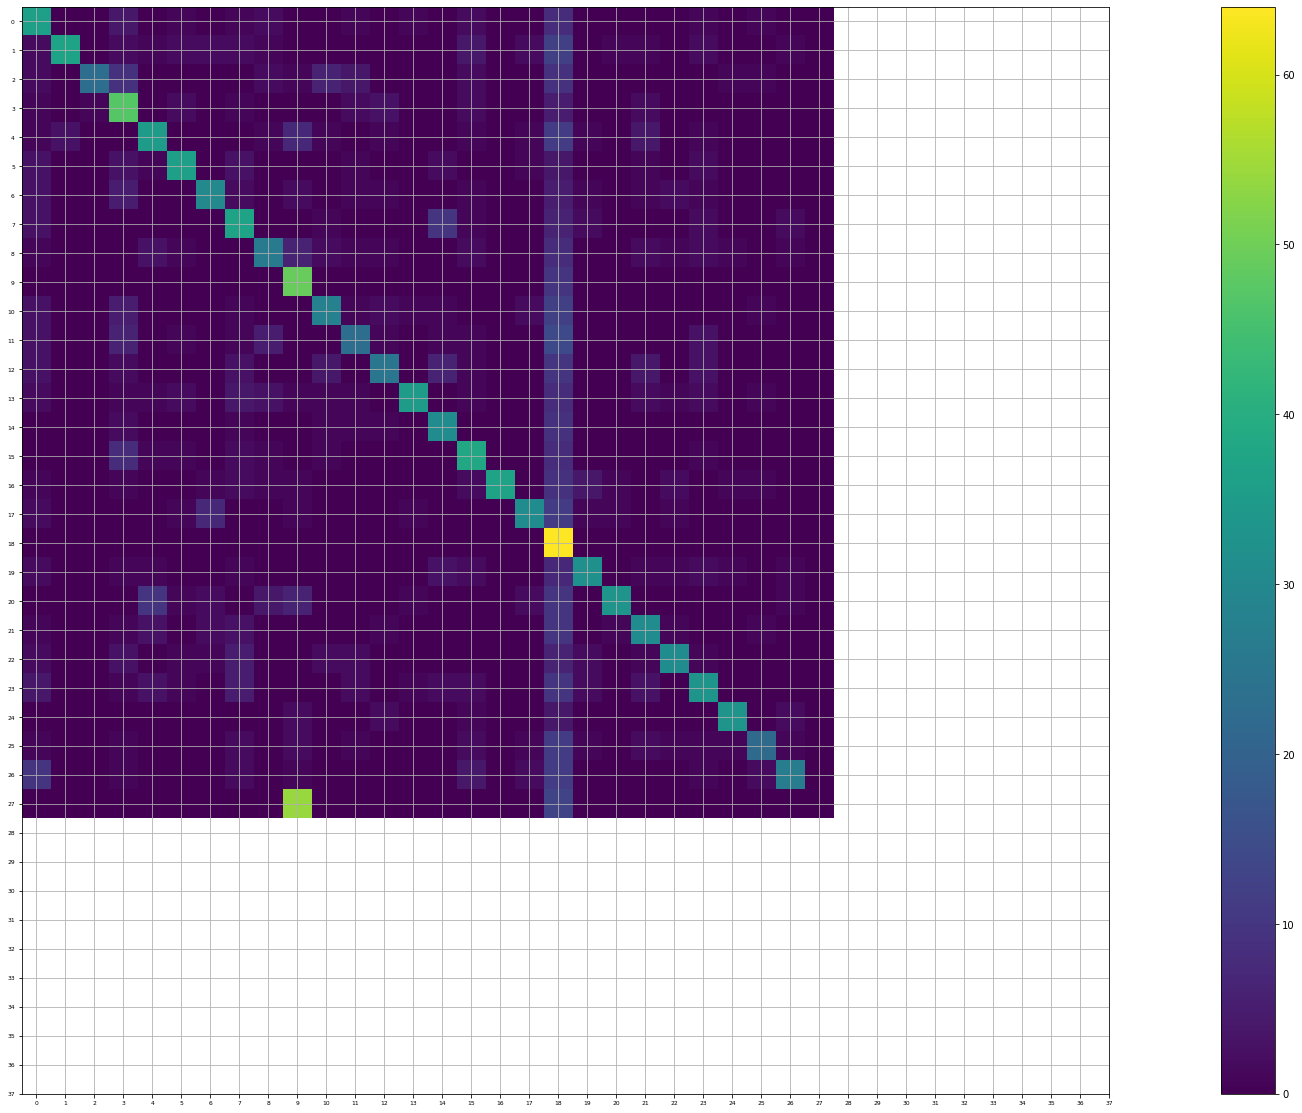

In [15]:
matrix = metrics.confusion_matrix(test_y, pred_svc)
print(matrix)
plt.rcParams["figure.figsize"] = (40,20)
plt.imshow(matrix)
plt.colorbar()
ticks=np.linspace(0, 37,num=38)
plt.xticks(ticks,fontsize=6)
plt.yticks(ticks,fontsize=6)
plt.grid(True)
plt.show()

In [18]:
import pickle
filename = 'SVM_MFCC.sav'
pickle.dump(svc, open(filename, 'wb'))
print("Saved model to disk")


# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

Saved model to disk


In [17]:
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)
import sys

print(sys.version)

3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
